# Data_from_OSM (pd & geopf)
# Warning: Not all the results are in NYC. Please use sjoin.

In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import sjoin
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

In [2]:
from pprint import pprint
from collections import MutableMapping
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = '{0}{1}{2}'.format(parent_key,sep,k) if parent_key else k
        if isinstance(v, MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            # apply itself to each element of the list - that's it!
            items.append((new_key, map(flatten, v)))
        else:
            items.append((new_key, v))
    return dict(items)

In [3]:
def dict_to_dataframe(data):
    dict_flat = []
    for element in data['elements']:
        dict_flat.append(flatten(element))
    pd_1 = pd.DataFrame.from_dict(dict_flat)
    if 'lat' in list(pd_1.columns.values):
        pd_2 = pd_1[['type', 'id', 'lat', 'lon', 'center_lat', 'center_lon', 'tags_addr:city', 'tags_amenity', 'tags_name']]
        for index, row in pd_2.iterrows():
            if row['type'] != 'node':
                pd_2.loc[index, 'lat'] = row['center_lat']
                pd_2.loc[index, 'lon'] = row['center_lon']
        pd_3 = pd_2.drop(['center_lat','center_lon'], axis=1)
        return pd_3
    else:
        pd_2 = pd_1[['type', 'id', 'center_lat', 'center_lon', 'tags_addr:city', 'tags_amenity', 'tags_name']]
        pd_2 = pd_2.rename(columns = {'center_lat':'lat', 'center_lon':'lon'})   
        return pd_2
    
    
    
    
    
    
    
    
    

In [4]:
def df_to_geodf(df):
    df_1 = df
    df_1['geometry'] = df_1.apply(lambda row: Point(row.lon, row.lat), axis=1)
    df_1 = gpd.GeoDataFrame(df_1, crs= "+init=epsg:4326")
    return df_1

# Restaurant

In [5]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["amenity"="restaurant"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["amenity"="restaurant"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [6]:
pd_restaurant = dict_to_dataframe(data)

/Users/michaelzheng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
#pd_restaurant

In [8]:
pd_restaurant.to_csv('restaurant.csv')

In [9]:
geopd_restaurant = df_to_geodf(pd_restaurant)

In [10]:
#geopd_restaurant

# Clinic

In [11]:
overpass_query = """
[out:json];
node["amenity"="clinic"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["amenity"="clinic"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["amenity"="clinic"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [12]:
pd_clinic = dict_to_dataframe(data)

In [13]:
#pd_clinic

In [14]:
pd_clinic.to_csv('clinic.csv')

In [15]:
geopd_clinic = df_to_geodf(pd_clinic)

In [16]:
#geopd_clinic

# Gym

In [17]:
overpass_query = """
[out:json];
node["leisure"="sports_centre"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["leisure"="sports_centre"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["leisure"="sports_centre"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [18]:
pd_gym = dict_to_dataframe(data)

In [19]:
#pd_gym

In [20]:
pd_gym.to_csv('gym.csv')

In [21]:
geopd_gym = df_to_geodf(pd_gym)

In [22]:
#geopd_gym

# Stadium

In [23]:
overpass_query = """
[out:json];
node["leisure"="stadium"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["leisure"="stadium"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["leisure"="stadium"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [24]:
pd_stadium = dict_to_dataframe(data)

In [25]:
#pd_stadium

In [26]:
#pd_stadium.to_csv('stadium.csv')

In [27]:
geopd_stadium = df_to_geodf(pd_stadium)

In [28]:
#geopd_stadium

# Clothes

In [29]:
overpass_query = """
[out:json];
node["shop"="clothes"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["shop"="clothes"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["shop"="clothes"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [30]:
def dict_to_dataframe_1(data):
    dict_flat = []
    for element in data['elements']:
        dict_flat.append(flatten(element))
    pd_1 = pd.DataFrame.from_dict(dict_flat)
    if 'lat' in list(pd_1.columns.values):
        pd_2 = pd_1[['type', 'id', 'lat', 'lon', 'center_lat', 'center_lon', 'tags_addr:city', 'tags_shop', 'tags_name']]
        for index, row in pd_2.iterrows():
            if row['type'] != 'node':
                pd_2.loc[index, 'lat'] = row['center_lat']
                pd_2.loc[index, 'lon'] = row['center_lon']
        pd_3 = pd_2.drop(['center_lat','center_lon'], axis=1)
        return pd_3
    else:
        pd_2 = pd_1[['type', 'id', 'center_lat', 'center_lon', 'tags_addr:city', 'tags_shop', 'tags_name']]
        pd_2 = pd_2.rename(columns = {'center_lat':'lat', 'center_lon':'lon'})   
        return pd_2

In [31]:
pd_clothes = dict_to_dataframe_1(data)

In [32]:
#pd_clothes

In [33]:
#pd_clothes.to_csv('clothes.csv')

In [34]:
geopd_clothes = df_to_geodf(pd_clothes)

In [35]:
#geopd_clothes

# Shoes

In [36]:
overpass_query = """
[out:json];
node["shop"="shoes"](40.499479, -74.288986, 40.932319, -73.709685);
out;
way["shop"="shoes"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
relation["shop"="shoes"](40.499479, -74.288986, 40.932319, -73.709685);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [37]:
pd_shoes = dict_to_dataframe_1(data)

In [38]:
#pd_shoes

In [39]:
#pd_shoes.to_csv('shoes.csv')

In [40]:
geopd_shoes = df_to_geodf(pd_shoes)

In [41]:
#geopd_shoes

# Use sjoin to get the facilities in NYC

In [42]:
newyorkcity = gpd.read_file('ZIP_CODE_040114.shp')

In [43]:
#newyorkcity

In [44]:
newyorkcity = newyorkcity.to_crs("+init=epsg:4326")

In [45]:
restaurant_with_codes = sjoin(geopd_restaurant, newyorkcity, how='inner')
restaurant_with_codes.to_csv('restaurant_with_codes.csv')

In [46]:
#restaurants_with_codes

In [47]:
clinic_with_codes = sjoin(geopd_clinic, newyorkcity, how='inner')
clinic_with_codes.to_csv('clinic_with_codes.csv')

In [48]:
#clinic_with_codes

In [49]:
gym_with_codes = sjoin(geopd_gym, newyorkcity, how='inner')
gym_with_codes.to_csv('gym_with_codes.csv')

In [50]:
#gym_with_codes

In [51]:
stadium_with_codes = sjoin(geopd_stadium, newyorkcity, how='inner')
stadium_with_codes.to_csv('stadium_with_codes.csv')

In [52]:
#stadium_with_codes

In [53]:
clothes_with_codes = sjoin(geopd_clothes, newyorkcity, how='inner')
clothes_with_codes.to_csv('clothes_with_codes.csv')

In [54]:
#clothes_with_codes

In [55]:
shoes_with_codes = sjoin(geopd_shoes, newyorkcity, how='inner')
shoes_with_codes.to_csv('shoes_with_codes.csv')

In [56]:
#shoes_with_codes

# Plot

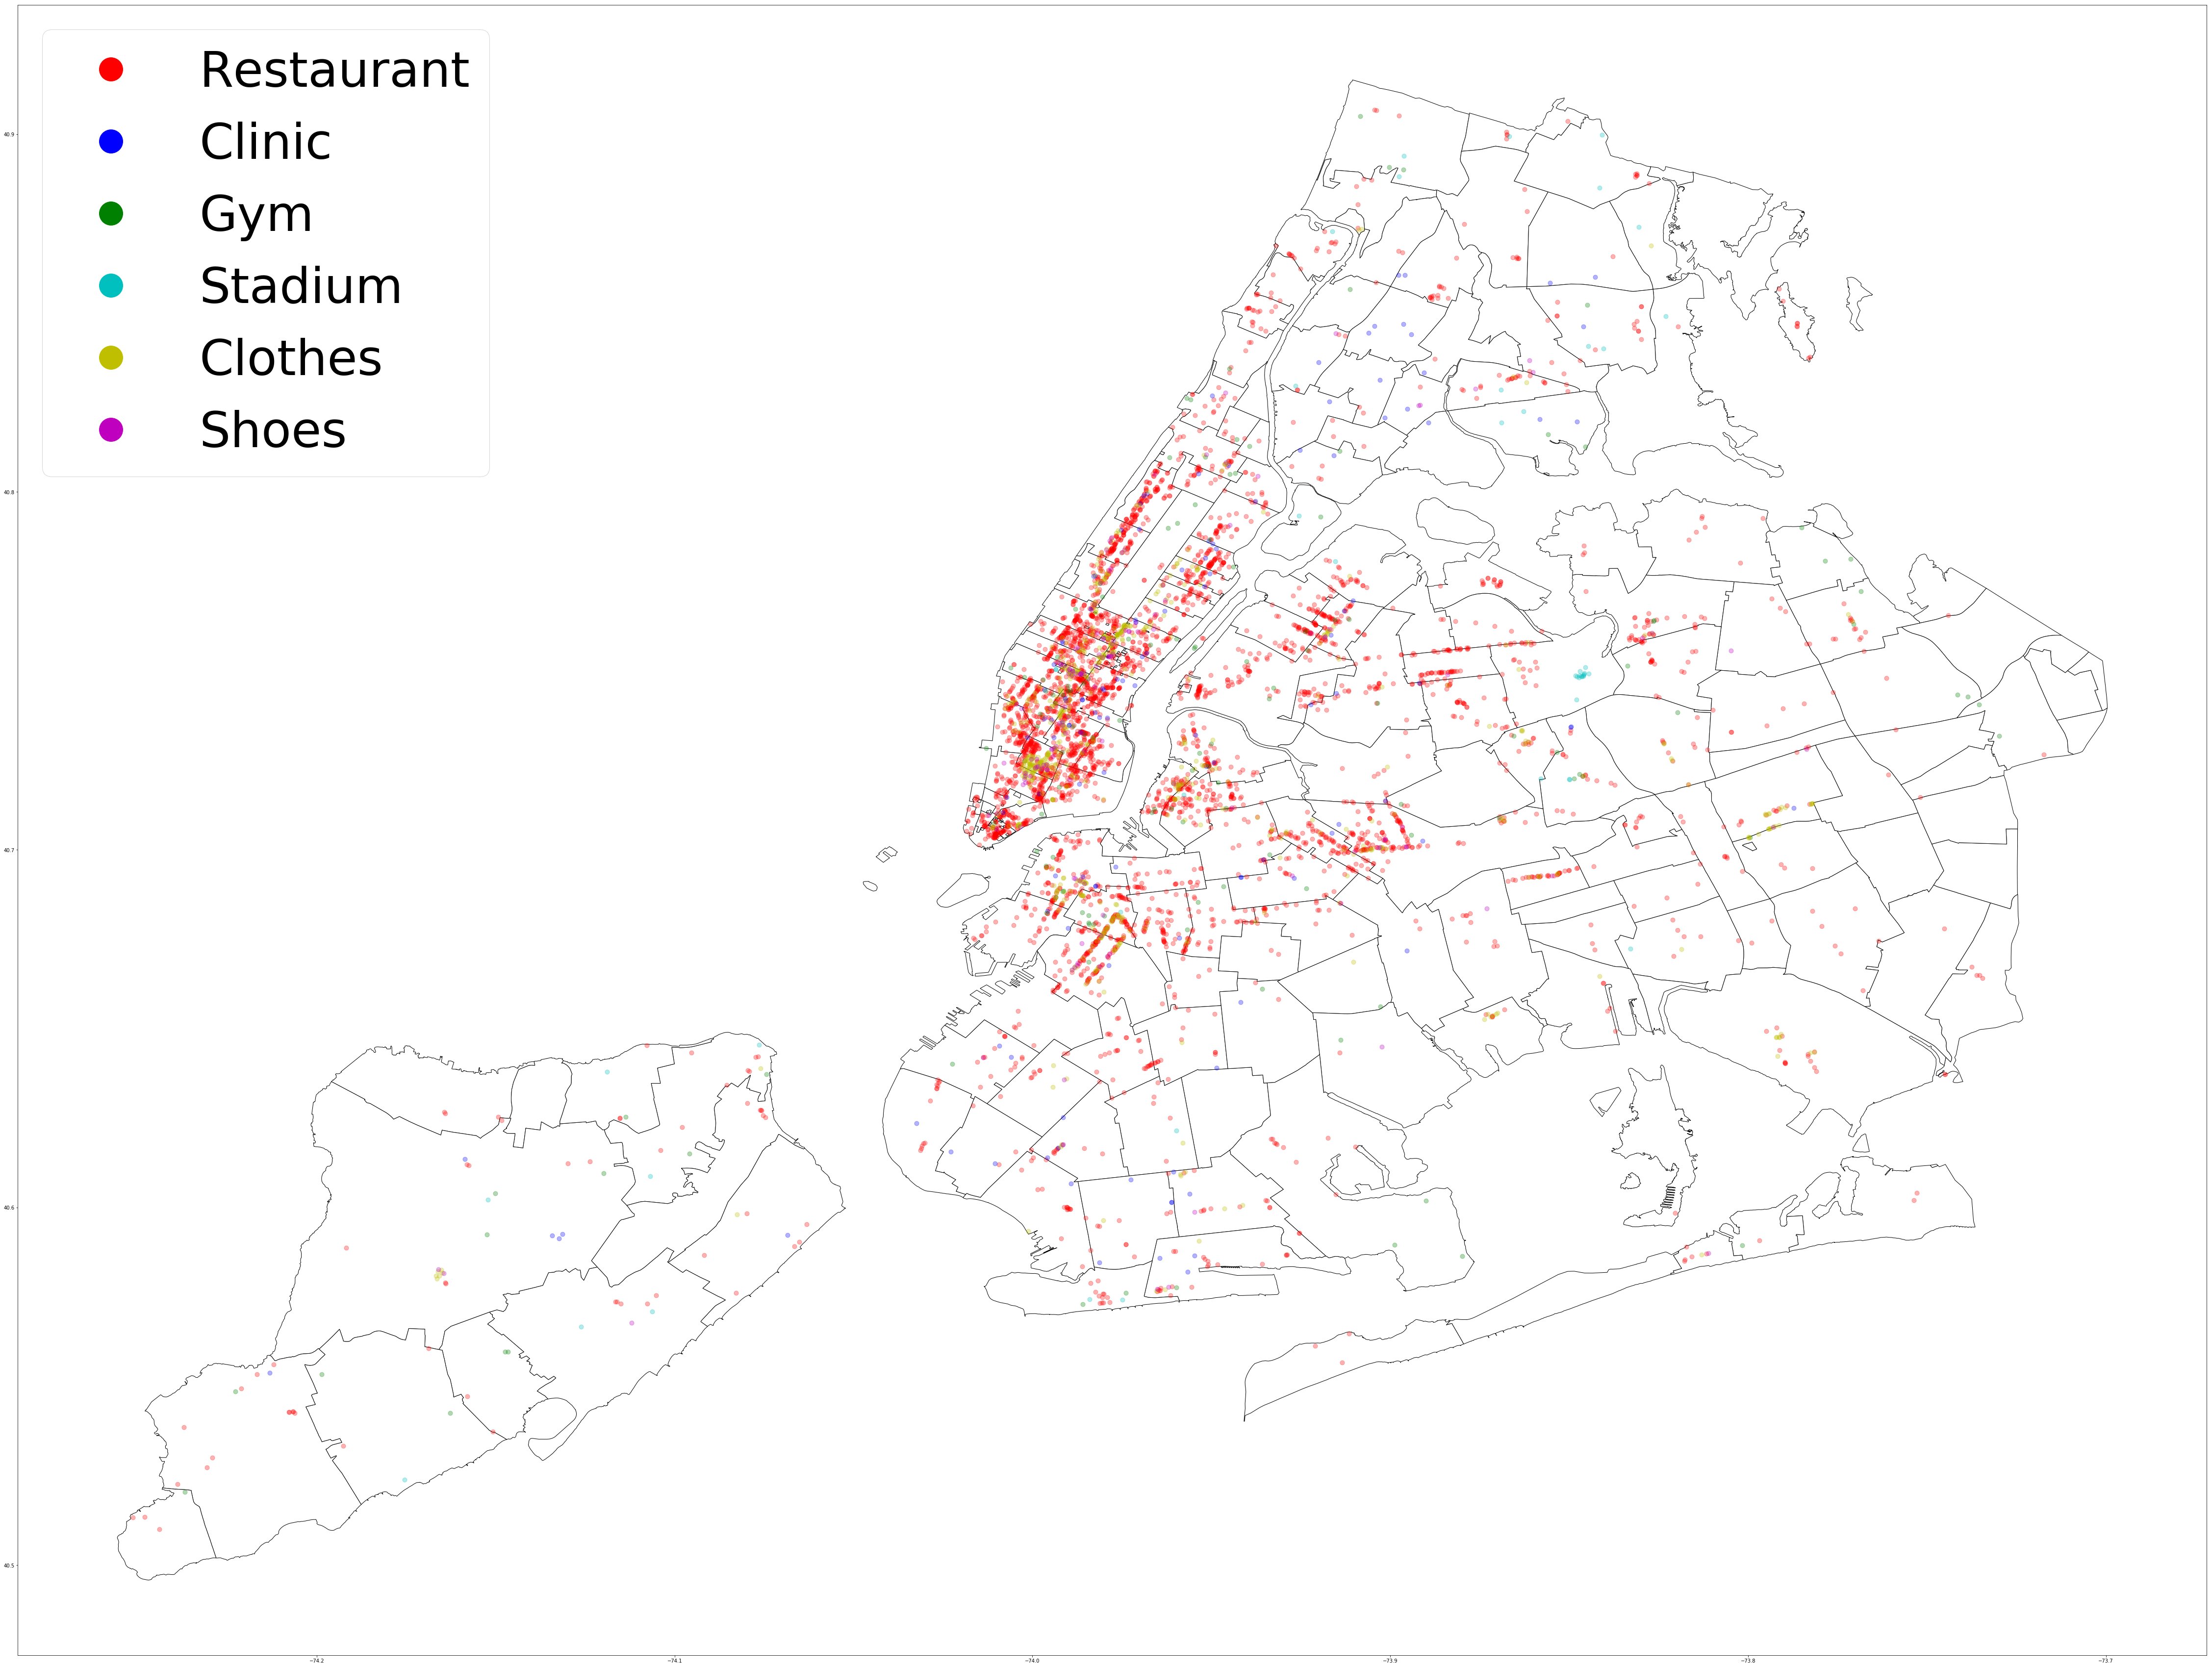

In [57]:
fig, ax = plt.subplots(figsize = (80,80))
ax.set_aspect('equal')
newyorkcity.plot(ax=ax,color = 'white', edgecolor ='black')
restaurant_with_codes.plot(ax=ax, c='r',alpha = 0.3, markersize = 80)
clinic_with_codes.plot(ax=ax, c='b',alpha = 0.3, markersize = 80)
gym_with_codes.plot(ax=ax, c='g',alpha = 0.3, markersize = 80)
stadium_with_codes.plot(ax=ax, c='c',alpha = 0.3, markersize = 80)
clothes_with_codes.plot(ax=ax, c='y',alpha = 0.3, markersize = 80)
shoes_with_codes.plot(ax=ax, c='m',alpha = 0.3, markersize = 80)
legend_elements = [Line2D([0], [0], marker='o', color='white', markerfacecolor="r", label='Restaurant', markersize=50),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor="b", label='Clinic', markersize=50),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor="g", label='Gym', markersize=50),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor="c", label='Stadium', markersize=50),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor="y",label='Clothes', markersize=50),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor="m",label='Shoes', markersize=50)]
ax.legend(handles=legend_elements, loc='upper left', prop={'size': 100})

plt.show()